In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv('usina.csv')

In [32]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [33]:
y = df['PE']
X = df.drop(columns=['PE'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230)

In [35]:
import statsmodels.api as sm

In [36]:
#adicionando o constante
X_train= sm.add_constant(X_train)

In [40]:
modelo = sm.OLS(y_train,X_train).fit()

In [41]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:56:51   Log-Likelihood:                -19662.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.937e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        446.1042     11.769     37.905      0.000     423.033     469.175
AT            -1.9607      0.018   -106.991      0.000      -1.997      -1.925
V             -0.2413      0.009    -27.670      0.000      -0.258      -0.224
AP             0.0702      0.011      6.152      0.000       0.048       0.093
RH            -0.1537      0.005    -30.823      0.000      -0.163      -0.144
==============================================================================
Omnibus:                      481.758   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1740.892
Skew:                          -0.300   Prob(JB):                         0.00
Kurtosis:                       5.424   Cond. No.                     2.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multicolinearidade

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
vif_1 = pd.DataFrame()
vif_1["variavel"] = explicativas

vif_1["vif"] = [variance_inflation_factor(X_train[explicativas].values, i)
                          for i in range(len(explicativas))]

print(vif_1)

  variavel           vif
0    const  44603.788615
1       AT      6.034363
2        V      3.954998
3       AP      1.468530
4       RH      1.717508


Os resultados obtidos referem-se ao cálculo do Fator de Inflação da Variância (VIF, do inglês Variance Inflation Factor), que é uma métrica usada para quantificar o grau de multicolinearidade em um modelo de regressão linear. O VIF fornece uma indicação de quão muito a variação de um coeficiente de regressão é aumentada devido à multicolinearidade.

Aqui está uma interpretação dos valores de VIF obtidos para cada variável:

1. **const**: Este valor alto (44603.788615) para a constante (intercepto) geralmente não é interpretado no contexto de multicolinearidade, pois é apenas um valor que ajusta a média da resposta quando todas as variáveis preditoras são iguais a zero.

2. **AT (Temperatura ambiente)**: O VIF de aproximadamente 6.03 indica uma multicolinearidade moderada. Um VIF superior a 5 pode ser motivo de preocupação, sugerindo que esta variável tem uma correlação linear moderada com as outras variáveis independentes no modelo.

3. **V (Velocidade do vento)**: Com um VIF de aproximadamente 3.95, indica uma multicolinearidade baixa a moderada. Isso sugere que há alguma correlação com outras variáveis preditivas, mas não é extremamente alta.

4. **AP (Pressão atmosférica)**: O VIF de aproximadamente 1.47 sugere que há pouca multicolinearidade relacionada a esta variável, indicando que ela tem uma relação linear relativamente baixa com as outras variáveis preditoras.

5. **RH (Umidade relativa)**: Um VIF de aproximadamente 1.72 também indica baixa multicolinearidade, mostrando que essa variável tem uma pequena correlação linear com as outras variáveis no modelo.

**Interpretação Geral**:
- Valores de VIF abaixo de 5 geralmente indicam uma multicolinearidade baixa, o que é o caso para AP, V e RH.
- Um VIF entre 5 e 10 (como o visto para AT) sugere uma multicolinearidade moderada, o que pode ou não ser motivo de preocupação, dependendo do contexto específico da análise.
- Valores de VIF acima de 10 indicariam uma multicolinearidade alta, o que não foi observado neste caso, exceto para a constante, que, como mencionado, geralmente não é considerada na análise de multicolinearidade.

Em resumo, os resultados indicam que, exceto pela temperatura ambiente (AT), as outras variáveis têm um nível aceitável de multicolinearidade no modelo. A temperatura ambiente apresenta um nível moderado de multicolinearidade e pode necessitar de uma investigação mais detalhada ou de uma possível reformulação do modelo.

## Análise de resíduos

In [44]:
import plotly.express as px

In [46]:
y_previsto_train =  modelo.predict(X_train)

In [47]:
fig = px.scatter(x=y_previsto_train, y=y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [48]:
# Residuos
residuos = modelo.resid

In [50]:
fig = px.scatter(x=y_previsto_train, y=residuos,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Resíduos'})
fig.show()

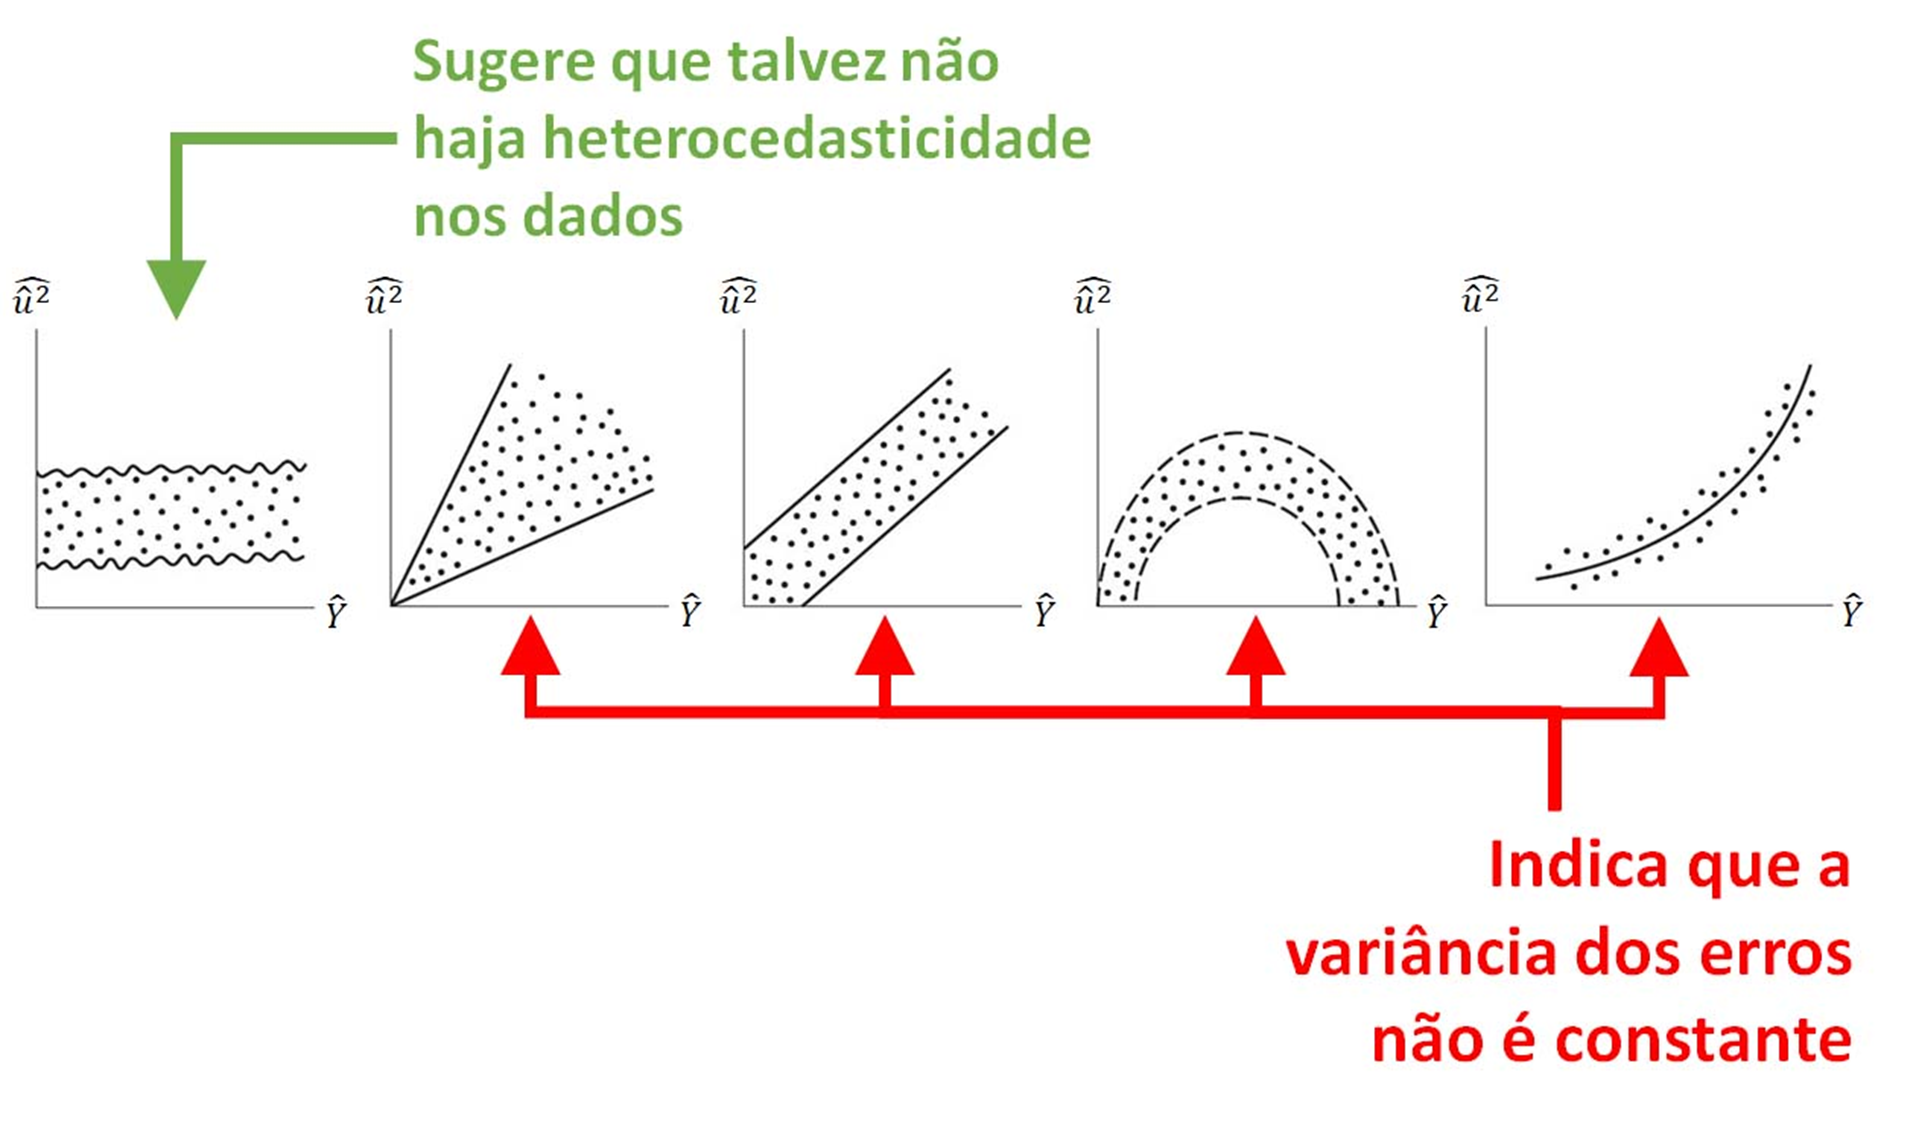

Como o gráfico de resíduos com a figura podemos inferir que não há heterocedasticidade para esse caso.